importando drive

In [ ]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D # Updated import statements
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import regularizers
from keras import metrics

In [ ]:
data_dir = pathlib.Path("/content/drive/MyDrive/TCC_DOCS/dataset_balanceado")
print(data_dir)

/content/drive/MyDrive/TCC_DOCS/dataset_balanceado


In [ ]:
#resnet50

In [ ]:
resnet50_img_size = 100
resnet50_batch_size = 150

resnet50_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(resnet50_img_size, resnet50_img_size),
    batch_size=resnet50_batch_size)

resnet50_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(resnet50_img_size,resnet50_img_size),
    batch_size=resnet50_batch_size)

resnet50_test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(resnet50_img_size,resnet50_img_size),
    batch_size=resnet50_batch_size)

class_names = resnet50_test_ds.class_names

Found 6544 files belonging to 5 classes.
Found 6544 files belonging to 5 classes.
Using 1308 files for validation.
Found 6544 files belonging to 5 classes.


In [ ]:
for image_batch, labels_batch in resnet50_train_ds:
  resnet50_train_img = image_batch
  resnet50_train_labels = labels_batch
  break
for image_batch, labels_batch in resnet50_val_ds:
  resnet50_val_img = image_batch
  resnet50_val_labels = labels_batch
  break
for image_batch, labels_batch in resnet50_test_ds:
  resnet50_test_img = image_batch
  resnet50_test_labels = labels_batch
  break

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

resnet50_train_ds = resnet50_train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
resnet50_val_ds = resnet50_val_ds.cache().prefetch(buffer_size=AUTOTUNE)
resnet50_test_ds = resnet50_test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(resnet50_img_size, resnet50_img_size, 3)),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Restnet50
img_shape = (resnet50_img_size,resnet50_img_size,3)
Resnet50_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=img_shape,
    pooling='avg',
    classes=5,
)
prediction_layer = tf.keras.layers.Dense(5,activation='relu',bias_regularizer=regularizers.l2(1e-4))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
num_classes = 5
resnet50_model = Sequential([
    data_augmentation,
    Resnet50_model,
    prediction_layer,
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Activation('softmax'),
])

In [ ]:
resnet50_model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
epochs = 50
history = resnet50_model.fit(
  resnet50_train_ds,
  validation_data=resnet50_val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


44/44 ━━━━━━━━━━━━━━━━━━━━ 256s 854ms/step - accuracy: 0.5154 - loss: 1.2453 - val_accuracy: 0.2034 - val_loss: 1.6096
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 562ms/step - accuracy: 0.7105 - loss: 0.8274 - val_accuracy: 0.2561 - val_loss: 1.6440
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 565ms/step - accuracy: 0.7437 - loss: 0.7547 - val_accuracy: 0.5046 - val_loss: 1.3913
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 570ms/step - accuracy: 0.7717 - loss: 0.6867 - val_accuracy: 0.4610 - val_loss: 1.4104
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 576ms/step - accuracy: 0.7786 - loss: 0.6618 - val_accuracy: 0.6346 - val_loss: 1.0180
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 579ms/step - accuracy: 0.7981 - loss: 0.6174 - val_accuracy: 0.6300 - val_loss: 1.0053
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 582ms/step - accuracy: 0.7971 - loss: 0.5993 - val_accuracy: 0.6812 - val_loss: 0.9415
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 585ms/step - accuracy: 0.8079 - loss: 0.5773 - val_accuracy: 0.57

In [ ]:
#Learning Rate Annealer Alexnet
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='val_accuracy',   factor=.01,   patience=3,  min_lr=1e-5)

history = resnet50_model.fit(
  resnet50_train_ds,
  validation_data=resnet50_val_ds,
  epochs=epochs,
  callbacks=[lrr],
  verbose=1,
)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 593ms/step - accuracy: 0.9706 - loss: 0.1076 - val_accuracy: 0.8081 - val_loss: 0.6537 - learning_rate: 0.0010
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 592ms/step - accuracy: 0.9734 - loss: 0.0979 - val_accuracy: 0.8081 - val_loss: 0.6021 - learning_rate: 0.0010
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 592ms/step - accuracy: 0.9731 - loss: 0.0991 - val_accuracy: 0.8196 - val_loss: 0.6594 - learning_rate: 0.0010
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 592ms/step - accuracy: 0.9706 - loss: 0.1044 - val_accuracy: 0.6506 - val_loss: 1.2273 - learning_rate: 0.0010
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 594ms/step - accuracy: 0.9737 - loss: 0.0919 - val_accuracy: 0.8379 - val_loss: 0.5549 - learning_rate: 0.0010
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 592ms/step - accuracy: 0.9726 - loss: 0.0997 - val_accuracy: 0.8379 - val_loss: 0.5395 - learning_rate: 0.0010
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 592ms/step - accuracy: 0.9733 - loss: 0.

In [ ]:
resnet50_loss, resnet50_acc = resnet50_model.evaluate(resnet50_test_ds)

44/44 ━━━━━━━━━━━━━━━━━━━━ 36s 813ms/step - accuracy: 0.9795 - loss: 0.0770


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 675ms/step


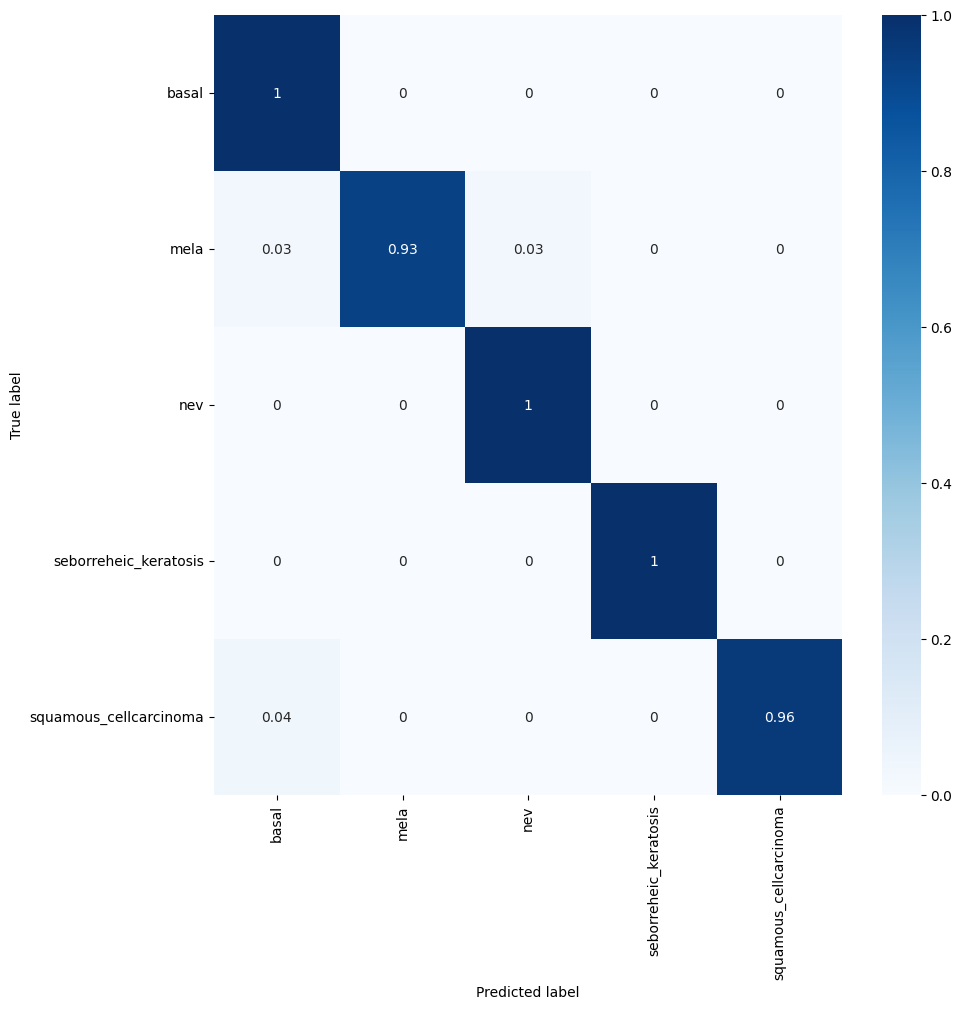

In [ ]:
resnet50_y_pred=np.argmax(resnet50_model.predict(resnet50_test_img), axis=-1)
resnet50_con_mat = tf.math.confusion_matrix(labels=resnet50_test_labels, predictions=resnet50_y_pred).numpy()

resnet50_con_mat_norm = np.around(resnet50_con_mat.astype('float') / resnet50_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

resnet50_con_mat_df = pd.DataFrame(resnet50_con_mat_norm,
                     index = class_names,
                     columns = class_names)

figure = plt.figure(figsize=(10, 10))
sns.heatmap(resnet50_con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
resnet50_y_pred = resnet50_model.predict(resnet50_test_ds)
resnet50_predicted_categories = np.argmax(resnet50_y_pred, axis = 1)

resnet50_true_categories = tf.concat([y for x, y in resnet50_test_ds], axis = 0).numpy() # convert to np array

print(classification_report(resnet50_true_categories, resnet50_predicted_categories))

44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1298
           1       0.99      0.96      0.97      1315
           2       0.97      0.99      0.98      1325
           3       0.97      0.98      0.98      1305
           4       0.99      0.98      0.98      1301

    accuracy                           0.98      6544
   macro avg       0.98      0.98      0.98      6544
weighted avg       0.98      0.98      0.98      6544

